### 导入库
顺便定义些常量

In [1]:
from helper import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


### 读取图片数据到内存

In [2]:
for i in tqdm(range(n)):
    data = cv2.imread(images_path[i])
    shape = data.shape[:2]
    shapes[i] = shape
    X[i] = cv2.resize(data, (width, width))

100%|██████████| 4000/4000 [00:09<00:00, 426.13it/s]


### 归一化
normalize

In [3]:
X = X.astype(np.float32) / 255.0
X[0]

array([[[ 0.13725491,  0.19607843,  0.36470589],
        [ 0.12941177,  0.18039216,  0.35294119],
        [ 0.12156863,  0.17254902,  0.34509805],
        ..., 
        [ 0.42745098,  0.50196081,  0.67843139],
        [ 0.41960785,  0.49411765,  0.67058825],
        [ 0.41960785,  0.49411765,  0.67058825]],

       [[ 0.14117648,  0.19215687,  0.36862746],
        [ 0.12941177,  0.18039216,  0.35686275],
        [ 0.12156863,  0.16862746,  0.34901962],
        ..., 
        [ 0.42745098,  0.50196081,  0.67843139],
        [ 0.42352942,  0.49411765,  0.67058825],
        [ 0.41960785,  0.49411765,  0.67058825]],

       [[ 0.14117648,  0.1882353 ,  0.37254903],
        [ 0.12941177,  0.17647059,  0.36078432],
        [ 0.1254902 ,  0.16470589,  0.34901962],
        ..., 
        [ 0.42745098,  0.50196081,  0.67843139],
        [ 0.42352942,  0.49803922,  0.67450982],
        [ 0.42352942,  0.49803922,  0.67450982]],

       ..., 
       [[ 0.18039216,  0.16470589,  0.69803923],
        

### A simple ConNet
15 layers

In [4]:
def simpleCatDogNet():
    model_ = Sequential()
    
    model_.add(Conv2D(32, (8, 8), padding='same', input_shape=input_shape, activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))
    model_.add(Dropout(0.5))
    
    model_.add(Conv2D(16, (4, 4), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))
    model_.add(Dropout(0.5))
    
    model_.add(Flatten())
    model_.add(Dense(512, activation='relu'))
    model_.add(Dropout(0.5))
    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))
    model_.add(Dense(64, activation='relu'))
    model_.add(Dropout(0.5))
    
    model_.add(Dense(n_class))
    model_.add(Activation(last_activate))
    
    return model_

In [5]:
model_simple_conv = simpleCatDogNet()
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      6176      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 16)      8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
__________

In [6]:
model_simple_conv.compile(optimizer=RMSprop(lr=lr), loss=loss_function, metrics=['accuracy'])
h = model_simple_conv.fit(x=X, y=y, batch_size=32, epochs=20, validation_split=0.25, verbose=0, shuffle=True, callbacks=[LossHistory()])

{'acc': 0.50533333349227905, 'loss': 0.86298979679743448, 'val_loss': 0.69310935497283932, 'val_acc': 0.496}
{'acc': 0.50033333341280617, 'loss': 0.6973678277333577, 'val_loss': 0.69309170722961422, 'val_acc': 0.53800000000000003}
{'acc': 0.52133333317438757, 'loss': 0.69284055964152014, 'val_loss': 0.69292537021636957, 'val_acc': 0.53400000000000003}
{'acc': 0.53433333333333333, 'loss': 0.68984512758255001, 'val_loss': 0.69241933441162107, 'val_acc': 0.53900000000000003}
{'acc': 0.57266666650772091, 'loss': 0.67836054420471192, 'val_loss': 0.68643294239044195, 'val_acc': 0.56499999999999995}
{'acc': 0.58799999999999997, 'loss': 0.66558818308512369, 'val_loss': 0.68282196807861328, 'val_acc': 0.58699999999999997}
{'acc': 0.62433333317438766, 'loss': 0.64779058567682901, 'val_loss': 0.68195411968231201, 'val_acc': 0.57099999999999995}
{'acc': 0.64600000015894576, 'loss': 0.62939763943354288, 'val_loss': 0.6708478450775146, 'val_acc': 0.59999999999999998}
{'acc': 0.66166666650772099, 'lo

### A simple ConNet 可视化训练过程

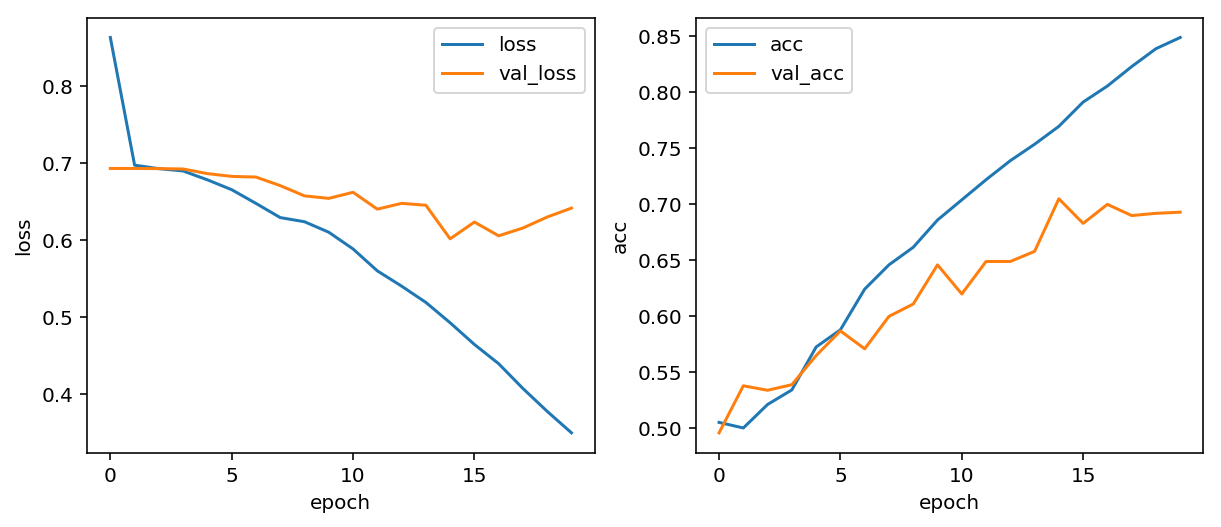

In [7]:
plotLossAndAccuracy(h.history)

### 在测试集上预测图片的分类
是狗还是猫？

100%|██████████| 12500/12500 [00:35<00:00, 355.23it/s]


I am 100.00% sure this is a Dog


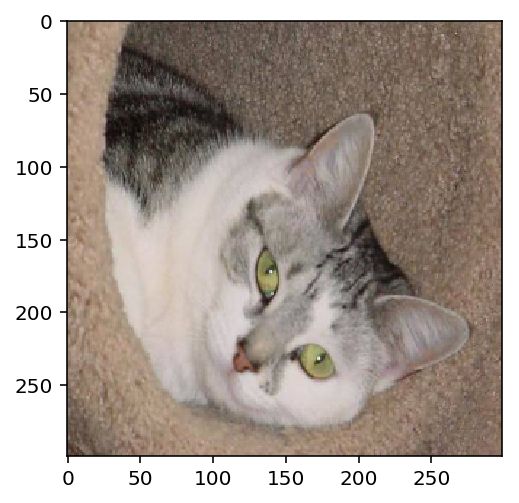

I am 100.00% sure this is a Dog


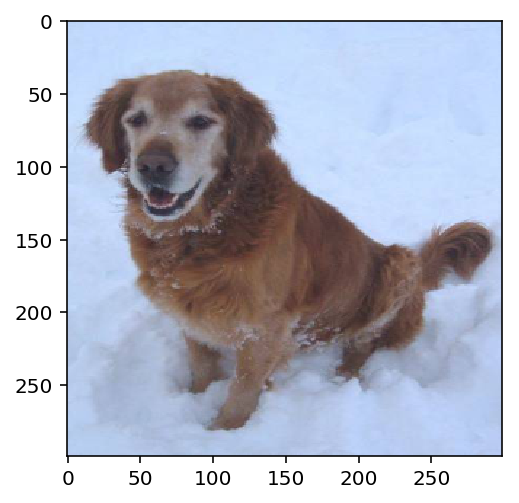

I am 100.00% sure this is a Dog


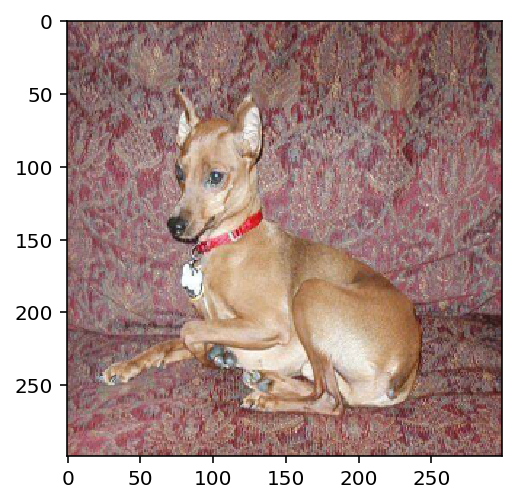

I am 100.00% sure this is a Cat


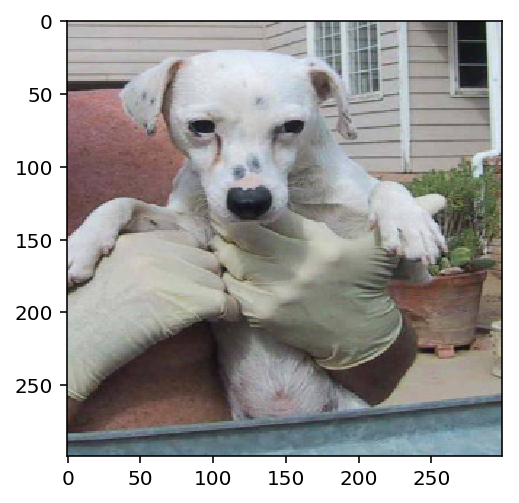

I am 100.00% sure this is a Cat


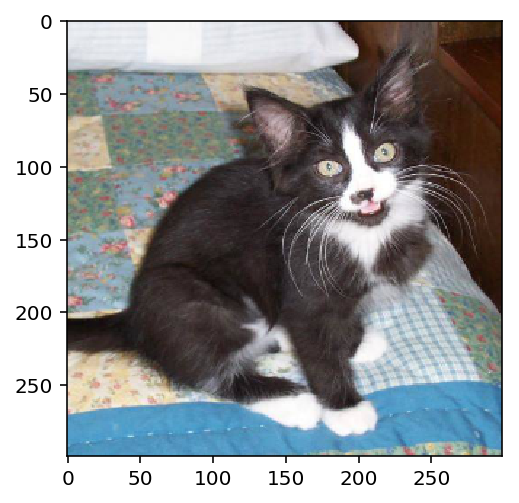

I am 100.00% sure this is a Cat


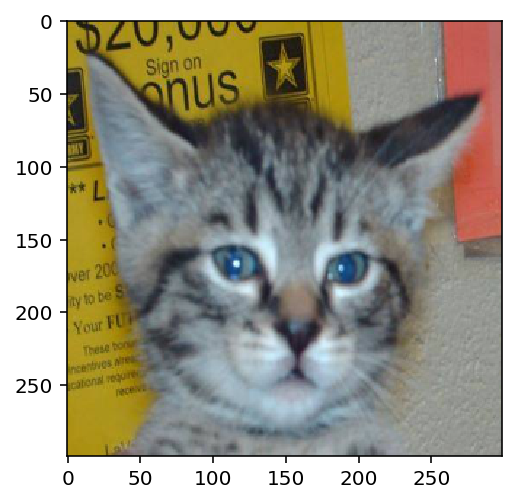

I am 100.00% sure this is a Cat


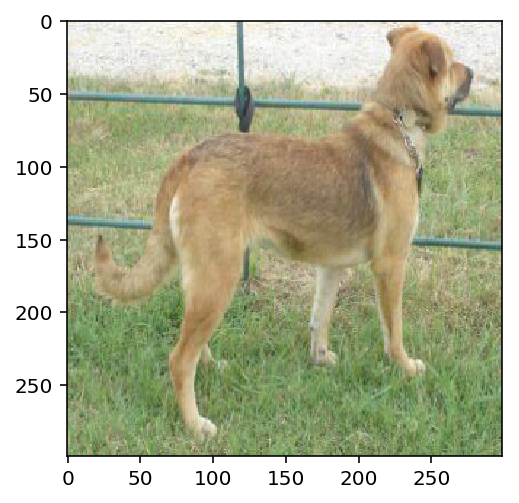

I am 100.00% sure this is a Dog


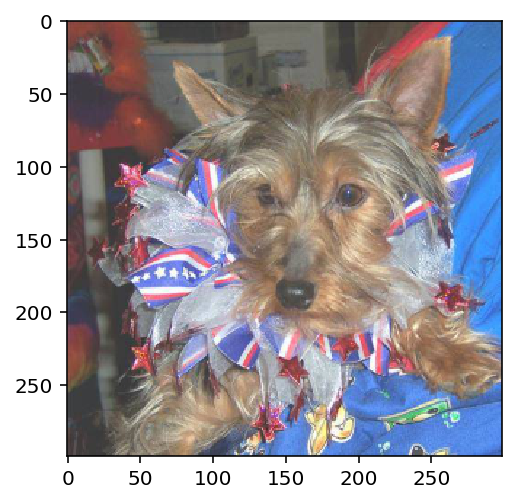

I am 100.00% sure this is a Cat


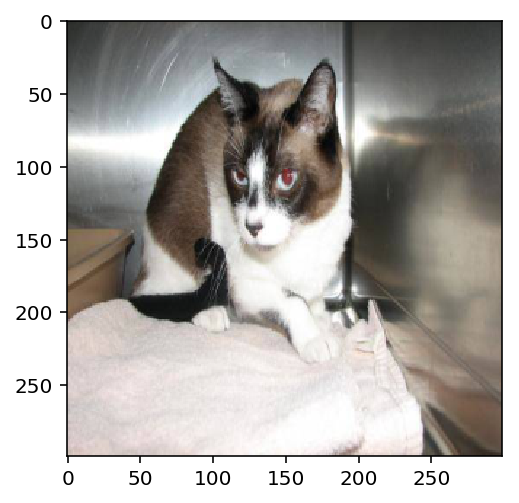

I am 100.00% sure this is a Cat


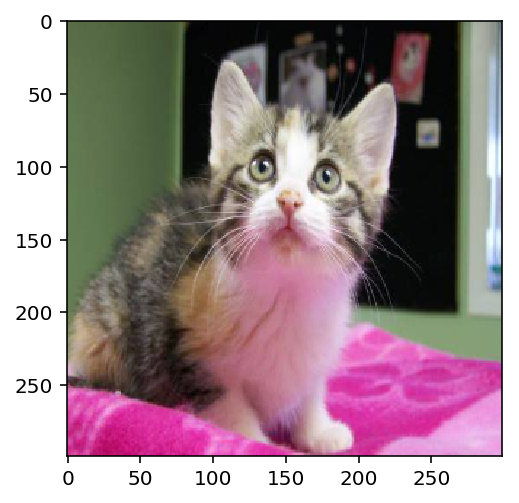

I am 99.81% sure this is a Cat


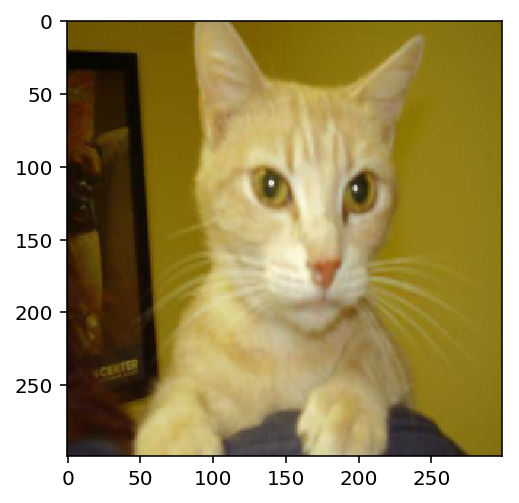

I am 100.00% sure this is a Dog


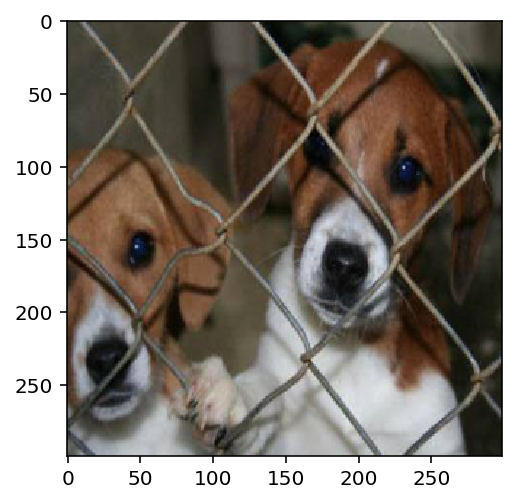

In [8]:
X_test, y_pred = predictOnTestSet(model_simple_conv)
plotPredictions(X_test, y_pred)

In [9]:
model_simple_conv.save_weights('w_simple_conv.h5')